<a href="https://colab.research.google.com/github/WellingtonLandim/wellingtonlandim.github.io/blob/main/Valida%C3%A7%C3%A3o%20Cruzada/Machine_Learning_e_Valida%C3%A7%C3%A3o_Cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Desempenho com Técnicas de Machine Learning e Validação Cruzada**
1 - Carregamento dos dados

2 - Amostragem: São criadas amostras aleatórias para análise comparativa.

3 - Pré-processamento: Separação das variáveis independentes e dependentes.

4 - K-Fold: Divide os dados para validação cruzada, treinando e avaliando o modelo.

5 - Random Forest: Modelo ajustado em cada divisão, com cálculo do erro médio quadrático.

6 - LOOCV: Avaliação do modelo em um cenário mais granular, com cálculo do erro médio absoluto.

# 1. Importação de Bibliotecas
**pandas**: Manipulação de dados em formato tabular (DataFrames).

**numpy**: Operações matemáticas e manipulação de arrays.

**matplotlib.pyplot**: Visualização de dados por gráficos.

**kagglehub**: Interface para baixar datasets do Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub


# 2. Download e Leitura dos Dados

In [2]:
#
!kaggle datasets download -d fivethirtyeight/the-ultimate-halloween-candy-power-ranking -p /content/
!unzip /content/the-ultimate-halloween-candy-power-ranking.zip -d /content/
candy = pd.read_csv('/content/candy-data.csv')
candy.head()

Dataset URL: https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking
License(s): other
  0% 0.00/2.06k [00:00<?, ?B/s]
100% 2.06k/2.06k [00:00<00:00, 4.07MB/s]
Archive:  /content/the-ultimate-halloween-candy-power-ranking.zip
  inflating: /content/candy-data.csv  


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [11]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [8]:
!kaggle datasets download -d fabdelja/tictactoe -p /content/
!unzip /content/tictactoe.zip -d /content/
tic_tac_toe = pd.read_csv('/content/Tic tac initial results.csv')
tic_tac_toe.head()

Dataset URL: https://www.kaggle.com/datasets/fabdelja/tictactoe
License(s): copyright-authors
tictactoe.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/tictactoe.zip
  inflating: /content/Tic tac initial results.csv  


,MOVE1,MOVE2,MOVE3,MOVE4,MOVE5,MOVE6,MOVE7,CLASS
0,0,8,1,3,?,?,?,loss
1,4,7,2,6,?,?,?,win
2,0,8,1,6,5,?,?,draw
3,4,7,2,3,?,?,?,draw
4,0,4,2,1,?,?,?,win


In [10]:
tic_tac_toe.describe()


,MOVE1
count,2436.000000
mean,3.701149
std,2.326566
min,0.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,8.000000


# 3. Amostragem de Dados
Amostragem aleatória de 200 observações a partir do DataFrame tic_tac_toe.

* random_state: Garante reprodutibilidade na seleção das amostras.

Contagem de registros comuns nas duas amostras.

* Lista os índices comuns e exibe a quantidade com len().

Distribuição da coluna CLASS nas amostras.

* value_counts(): Conta as ocorrências de cada classe

In [9]:
# Cria duas amostras diferentes com 200 observações
sample1 = tic_tac_toe.sample(n=200, random_state=1111)
sample2 = tic_tac_toe.sample(n=200, random_state=1171)

In [12]:
# mostra o numero de observações comuns
print(len([index for index in sample1.index if index in sample2.index]))

19


In [13]:
# Mostra o numero de observação na coluna CLASS para as duas amostras
print(sample1['CLASS'].value_counts())
print(sample2['CLASS'].value_counts())

CLASS
draw    85
win     63
loss    52
Name: count, dtype: int64
CLASS
draw    99
win     53
loss    48
Name: count, dtype: int64


# 4. Preparação dos Dados para Machine Learning
* X: Variáveis independentes (todas as colunas, exceto competitorname e winpercent).
* y: Variável dependente (winpercent).
* to_numpy(): Converte os DataFrames para arrays NumPy.

In [14]:
X = candy.drop(['competitorname', 'winpercent'], axis=1).to_numpy()
y = candy['winpercent'].to_numpy()


# 5. Validação Cruzada com K-Fold
* KFold: Divide os dados em 5 grupos para validação cruzada.
 * n_splits=5: Número de divisões.
 * shuffle=True: Embaralha os dados antes de dividir.
* split(X): Gera índices para treino e validação em cada iteração.

In [20]:
from sklearn.model_selection import KFold


In [21]:
# Utilização do KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Cria as divisões
splits = kf.split(X)

In [24]:
# Mostra o numero de indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))

Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17


# 6. Treinamento e Avaliação com Random Forest
* RandomForestRegressor: Modelo de aprendizado supervisionado para regressão.
 *  n_estimators=25: Número de árvores na floresta.
* Treinamento em cada divisão dos dados (train_index, val_index).
 *  fit(): Treina o modelo.
 * predict(): Gera predições para os dados de validação.
 * mean_squared_error(): Calcula o erro médio quadrático das previsões.

In [29]:
# Gera as divisões
splits = kf.split(X)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [31]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

In [32]:
# Acessa os índices de treinamento e validação das divisões
for train_index, val_index in splits:
    # prepara as informações para treinamento e validação
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]

In [33]:
    # Ajusta o modelo Random Forest
    rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=1111)

In [34]:
    # Realiza as predições e demonstra o erro
    predictions = rfc.predict(X_val)
    print("Split accuracy: " + str(mean_squared_error(y_val, predictions)))

Split accuracy: 221.63020627476214


MSE (Mean Squared Error):

É uma métrica de avaliação que mede a diferença média quadrática entre os valores previstos pelo modelo e os valores reais no conjunto de validação.
A fórmula do MSE é:
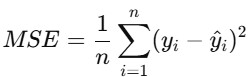

Onde:

𝑦𝑖: Valor real (esperado).

𝑦
^i
​: Valor previsto pelo modelo.

𝑛: Número de amostras no conjunto de validação.

Significado do Valor:

* O valor 221.63 indica que, em média, o quadrado do erro das previsões é 221.63.
* Como o erro foi elevado ao quadrado, ele está em unidades quadráticas do que está sendo previsto (neste caso, o winpercent dos doces).

Interpretação:

* Um MSE menor indica que o modelo fez previsões mais próximas dos valores reais.
* Um MSE maior sugere que o modelo teve dificuldade em ajustar os dados ou que pode haver ruído nos dados de entrada.

# 7. Validação Cruzada com LOOCV
* Leave-One-Out Cross Validation (LOOCV):
 * Cada instância é usada como validação, enquanto o restante é usado para treinamento.
 * cv=85: Número de divisões igual ao número de amostras.
* mean_absolute_error: Métrica usada para avaliar a precisão.
* make_scorer(): Transforma a métrica em um "scorer" compatível com cross_val_score.


In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Cria o scorer
mae_scorer = make_scorer(mean_absolute_error)

In [38]:
rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

In [39]:
# Implementa o LOOCV
scores = cross_val_score(rfr, X, y, cv=85, scoring=mae_scorer)

In [40]:
# Mostra a média e o desvio padrão
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 9.52044832324183.
The standard deviation of the errors is: 7.349020637882744.


O erro médio de 9.52 pode ser considerado aceitável ou não, dependendo da escala do problema (neste caso, winpercent, que varia de 0 a 100).

O desvio padrão de 7.35 sugere que o desempenho do modelo pode variar dependendo do subconjunto usado para treinamento/validação